In [132]:
import os
import numpy as np
import cv2
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

base_path = "D:/University Files/10th Semester/CVPR/animal_dataset/"


In [133]:
image_paths = []
labels = []

classes = ["cat", "dog", "panda"]

for class_name in classes:
    class_folder = os.path.join(base_path, class_name)
    
    for filename in os.listdir(class_folder):
        file_path = os.path.join(class_folder, filename)
        
        if file_path.endswith((".jpg")):
            image_paths.append(file_path)
            labels.append(class_name)


In [134]:
print(len(image_paths))
print(len(labels))

300
300


In [142]:
def preprocess_image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (32, 32))
    return (img.astype("float32") / 255.0).flatten()


In [144]:
X=np.array([preprocess_image(p) for p in image_paths])
y=np.array(labels)


X shape: (300, 1024)
y shape: (300,)
First 5 labels: ['cat' 'cat' 'cat' 'cat' 'cat']
First sample shape (flat): (1024,)
First sample as image:


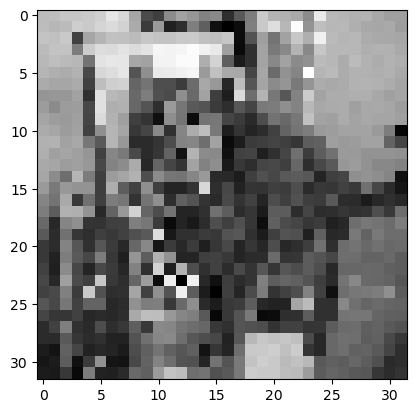

In [145]:
print("X shape:", X.shape)
print("y shape:", y.shape)

print("First 5 labels:", y[:5])
print("First sample shape (flat):", X[0].shape)
print("First sample as image:")
plt.imshow(X[0].reshape(32, 32), cmap='gray')
plt.show()


In [148]:
import numpy as np

seed = 5
rng = np.random.RandomState(seed)
perm = rng.permutation(len(X))

X = X[perm]
y = y[perm]


X shape: (300, 1024)
y shape: (300,)
First 5 labels: ['cat' 'panda' 'panda' 'panda' 'cat']
First sample shape (flat): (1024,)
First sample as image:


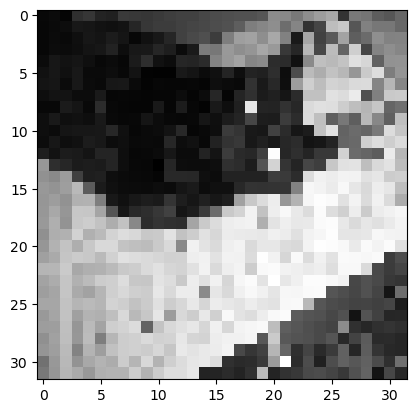

In [150]:
print("X shape:", X.shape)
print("y shape:", y.shape)

print("First 5 labels:", y[:5])
print("First sample shape (flat):", X[0].shape)
print("First sample as image:")
plt.imshow(X[0].reshape(32, 32), cmap='gray')
plt.show()


In [152]:
kf = KFold(n_splits=5, shuffle=False)


In [154]:
def manhattan(a,b):
    return np.sum(np.abs(a-b))

def euclidean(a,b):
    return np.sqrt(np.sum((a-b)**2))


In [156]:
def distances_vectorized(test_sample,train_X,metric='l2'):
    if metric == 'l1':
        return np.sum(np.abs(train_X-test_sample), axis=1)
    else:
        return np.sqrt(np.sum((train_X-test_sample) ** 2, axis=1))


In [158]:
def knn_predict(test_sample, train_X, train_y, K, distance_fn):
    distances = []

    for i in range(len(train_X)):
        d = distance_fn(test_sample, train_X[i])
        distances.append((d, train_y[i]))

    distances.sort(key=lambda x: x[0])

    top_k = [label for (_, label) in distances[:K]]

    return max(set(top_k), key=top_k.count)


In [160]:
K_values = [3, 5, 7, 9, 11,13]


In [162]:
accuracy_L1 ={K: [] for K in K_values}
accuracy_L2 ={K: [] for K in K_values}
fold_no = 0
for train_idx, val_idx in kf.split(X):
    fold_no += 1
    train_X, val_X = X[train_idx], X[val_idx]
    train_y, val_y = y[train_idx], y[val_idx]
    print(f"Starting fold {fold_no} -- train: {train_X.shape[0]} val: {val_X.shape[0]}")
    for K in K_values:
       
        correct = 0
        for i in range(len(val_X)):
            pred = knn_predict(val_X[i], train_X, train_y, K, manhattan)
            if pred == val_y[i]:
                correct += 1
        accuracy_L1[K].append(correct / len(val_X))
        
        correct = 0
        for i in range(len(val_X)):
            pred = knn_predict(val_X[i], train_X, train_y, K, euclidean)
            if pred == val_y[i]:
                correct += 1
        accuracy_L2[K].append(correct / len(val_X))
        
        print(f"  K={K}: L1={accuracy_L1[K][-1]:.3f}, L2={accuracy_L2[K][-1]:.3f}")
    
    print(f"  fold {fold_no} completed.\n")

Starting fold 1 -- train: 240 val: 60
  K=3: L1=0.417, L2=0.400
  K=5: L1=0.417, L2=0.367
  K=7: L1=0.450, L2=0.317
  K=9: L1=0.483, L2=0.417
  K=11: L1=0.500, L2=0.417
  K=13: L1=0.483, L2=0.383
  fold 1 completed.

Starting fold 2 -- train: 240 val: 60
  K=3: L1=0.433, L2=0.300
  K=5: L1=0.483, L2=0.367
  K=7: L1=0.467, L2=0.400
  K=9: L1=0.517, L2=0.333
  K=11: L1=0.483, L2=0.383
  K=13: L1=0.450, L2=0.383
  fold 2 completed.

Starting fold 3 -- train: 240 val: 60
  K=3: L1=0.433, L2=0.383
  K=5: L1=0.383, L2=0.400
  K=7: L1=0.417, L2=0.367
  K=9: L1=0.367, L2=0.333
  K=11: L1=0.367, L2=0.350
  K=13: L1=0.400, L2=0.367
  fold 3 completed.

Starting fold 4 -- train: 240 val: 60
  K=3: L1=0.417, L2=0.367
  K=5: L1=0.400, L2=0.283
  K=7: L1=0.350, L2=0.417
  K=9: L1=0.400, L2=0.333
  K=11: L1=0.350, L2=0.333
  K=13: L1=0.400, L2=0.400
  fold 4 completed.

Starting fold 5 -- train: 240 val: 60
  K=3: L1=0.317, L2=0.400
  K=5: L1=0.400, L2=0.383
  K=7: L1=0.417, L2=0.367
  K=9: L1=0.450,

In [164]:
avg_L1={K: np.mean(accuracy_L1[K]) for K in K_values}
avg_L2={K: np.mean(accuracy_L2[K]) for K in K_values}

print("\n Per-K 5-fold accuracies (L1)")
for K in K_values:
    print(f"K={K}: fold_accs={['{:.3f}'.format(a) for a in accuracy_L1[K]]}  avg={avg_L1[K]:.4f}")

print("\n Per-K 5-fold accuracies (L2)")
for K in K_values:
    print(f"K={K}: fold_accs={['{:.3f}'.format(a) for a in accuracy_L2[K]]}  avg={avg_L2[K]:.4f}")


 Per-K 5-fold accuracies (L1)
K=3: fold_accs=['0.417', '0.433', '0.433', '0.417', '0.317']  avg=0.4033
K=5: fold_accs=['0.417', '0.483', '0.383', '0.400', '0.400']  avg=0.4167
K=7: fold_accs=['0.450', '0.467', '0.417', '0.350', '0.417']  avg=0.4200
K=9: fold_accs=['0.483', '0.517', '0.367', '0.400', '0.450']  avg=0.4433
K=11: fold_accs=['0.500', '0.483', '0.367', '0.350', '0.417']  avg=0.4233
K=13: fold_accs=['0.483', '0.450', '0.400', '0.400', '0.467']  avg=0.4400

 Per-K 5-fold accuracies (L2)
K=3: fold_accs=['0.400', '0.300', '0.383', '0.367', '0.400']  avg=0.3700
K=5: fold_accs=['0.367', '0.367', '0.400', '0.283', '0.383']  avg=0.3600
K=7: fold_accs=['0.317', '0.400', '0.367', '0.417', '0.367']  avg=0.3733
K=9: fold_accs=['0.417', '0.333', '0.333', '0.333', '0.383']  avg=0.3600
K=11: fold_accs=['0.417', '0.383', '0.350', '0.333', '0.417']  avg=0.3800
K=13: fold_accs=['0.383', '0.383', '0.367', '0.400', '0.433']  avg=0.3933


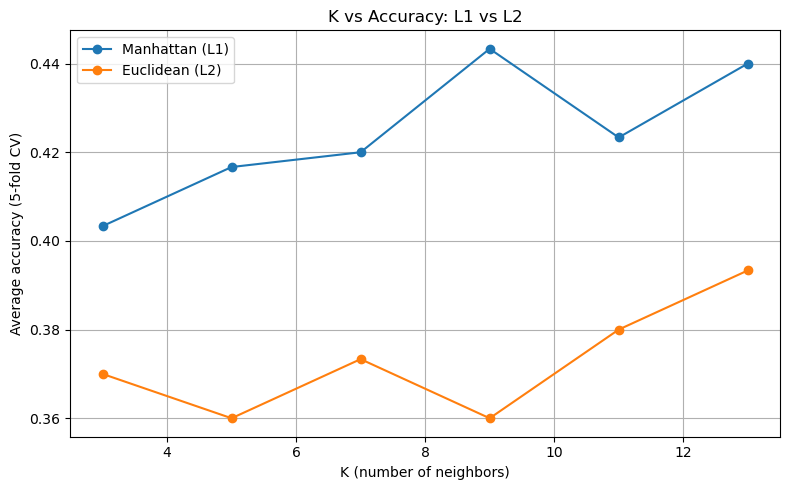

In [166]:
plt.figure(figsize=(8,5))
plt.plot(K_values, [avg_L1[K] for K in K_values], marker='o', label='Manhattan (L1)')
plt.plot(K_values, [avg_L2[K] for K in K_values], marker='o', label='Euclidean (L2)')
plt.xlabel("K (number of neighbors)")
plt.ylabel("Average accuracy (5-fold CV)")
plt.title("K vs Accuracy: L1 vs L2")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [168]:
best_choice = None
best_acc = -1.0
for K in K_values:
    for metric, acc_map in [('L1',avg_L1), ('L2',avg_L2)]:
        acc = acc_map[K] if metric=='L1' else avg_L2[K]
        if acc > best_acc or (acc == best_acc and K < best_choice[1]) or (acc == best_acc and K == best_choice[1] and metric == 'L1' and best_choice[0]=='L2'):
            best_acc = acc
            best_choice = (metric, K, acc)

print("\n Best choice by average accuracy")
print(f"Best Metric: {best_choice[0]}, Best K: {best_choice[1]}, Avg Accuracy: {best_choice[2]:.4f}")


 Best choice by average accuracy
Best Metric: L1, Best K: 9, Avg Accuracy: 0.4433
